In [1]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt

from collections import namedtuple
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import data_processing as dp
import model
import model_utilities as util
import vocab
import batch_samplers

In [3]:
import importlib

In [4]:
importlib.reload(model)

<module 'model' from '/media/itasarom/7158f0d7-af1d-45d4-855f-86204aed5a8b/Projects/diplom/GAN/model.py'>

In [5]:
# vocab1, all_labels, sents1, labels1 = dp.load_problem(lang='ma')
# vocab2, all_labels, sents2, labels2 = dp.load_problem(lang='es')
vocab1, all_labels, sents1, labels1 = dp.load_problem(lang='fr')
vocab2, all_labels, sents2, labels2 = dp.load_problem(lang='en')

In [6]:
len(vocab1.embeddings), len(vocab2.embeddings)

(47377, 47404)

In [7]:
!python -c "import torch; print(torch.cuda.is_available(), torch.cuda.device_count())"

True 1


In [8]:
!pwd

/media/itasarom/7158f0d7-af1d-45d4-855f-86204aed5a8b/Projects/diplom/GAN


In [9]:
torch.cuda.is_available()

True

In [10]:
torch.cuda.device_count()

1

In [11]:
import os
os.environ["LD_LIBRARY_PATH"]

'/home/itasarom/Documents/Projects/link_to_projects/apertium/apertium_root//lib:/usr/local/cuda-9.0/lib64::/usr/lib/x86_64-linux-gnu:/usr/local/lib:/usr/local/cuda/lib64:/usr/lib/x86_64-linux-gnu:/usr/lib/nvidia-387'

In [12]:
import sys
sys.executable

'/home/itasarom/.programs/anaconda2/envs/torch/bin/python'

In [13]:
sys.argv[0]

'/home/itasarom/.programs/anaconda2/envs/torch/lib/python3.5/site-packages/ipykernel/__main__.py'

In [14]:
# del cls

In [15]:
import gc
gc.collect()

11

In [16]:
# del cls
torch.cuda.empty_cache()

In [17]:
sent_sampler_1 = batch_samplers.BatchSamplerRegularizer(sents=sents1, labels=labels1, vocab=vocab1, all_labels=all_labels)

In [18]:
sent_sampler_2 = batch_samplers.BatchSamplerRegularizer(sents=sents2, labels=labels2, vocab=vocab2, all_labels=all_labels)

In [19]:
embed_sampler_1 = batch_samplers.BatchSamplerDiscriminator(vocab1)

In [20]:
embed_sampler_2 = batch_samplers.BatchSamplerDiscriminator(vocab2)

In [21]:
# sent_sampler_1.get_batch(3)
# embed_sampler_1

In [22]:
import IPython


In [22]:
cls = model.GAN(100, len(all_labels))

In [23]:
cls = cls.cuda()

In [24]:
# params = {
#     'save_path': "./model_checkpoint.tc",
#     'save_every':10,
#     'sentence_iterations':200,
#     'discr_iterations':1,
#     'transform_iterations':500,
#     'n_sents_1':128,
#     'n_sents_2':128,
#     'n_discr_1':128,
#     'n_discr_2':128,
#     'n_iter':20
    
# }

# params = {
#     'save_path': "./model_checkpoint.tc",
#     'save_every':10,
#     'sentence_iterations':2,
#     'discr_iterations':1,
#     'transform_iterations':5,
#     'n_sents_1':128,
#     'n_sents_2':128,
#     'n_discr_1':128,
#     'n_discr_2':128,
#     'n_iter':20
    
# }

params = {
    'save_path': "./model_checkpoint_2_layers.tc",
    'save_every':10,
    'sentence_iterations':200,
    'discr_iterations':20,
    'transform_iterations':80,
    'n_sents_1':128,
    'n_sents_2':128,
    'n_discr_1':1024,
    'n_discr_2':1024,
    'n_iter':200
    
}

In [25]:
# trainer.global_iterations = 60

In [26]:
trainer = util.Trainer(cls)

In [27]:
trainer.restore("./model_checkpoint_2_layers.tc")
cls.train()

GAN(
  (discriminator): Discriminator(
    (actual_model): Sequential(
      (0): Linear(in_features=100, out_features=1024)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
      (2): LeakyReLU(0.3)
      (3): Linear(in_features=1024, out_features=512)
      (4): Dropout(p=0.5)
      (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
      (6): LeakyReLU(0.3)
      (7): Linear(in_features=512, out_features=2)
    )
    (softmax): Softmax()
    (loss_function): CrossEntropyLoss(
    )
  )
  (classifier): RnnClassifier(
    (rnn_cell): LSTM(100, 128, batch_first=True)
    (dense): Linear(in_features=128, out_features=256)
    (logits_layer): Linear(in_features=256, out_features=26)
    (softmax_layer): Softmax()
    (loss_function): CrossEntropyLoss(
    )
  )
  (transformation_1): Sequential(
    (0): Linear(in_features=100, out_features=100)
  )
  (transformation_2): Sequential(
    (0): Linear(in_features=100, out_features=100)
  )
)

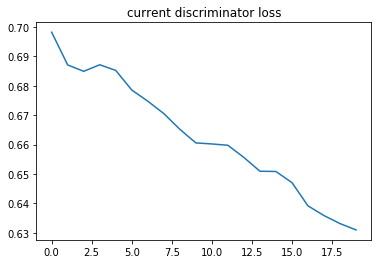

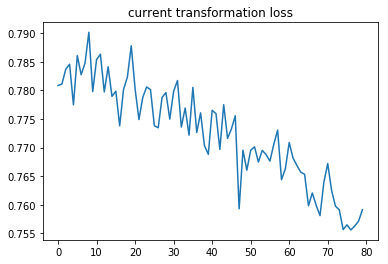

Iter 199 class -1.0, discr0.6628026366233826, transform 0.7726215720176697


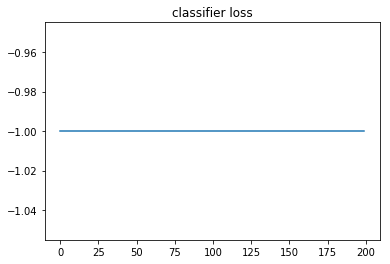

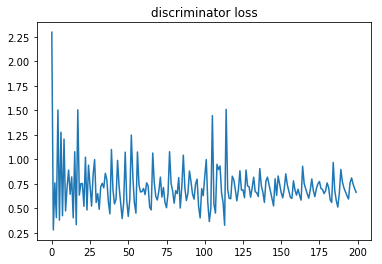

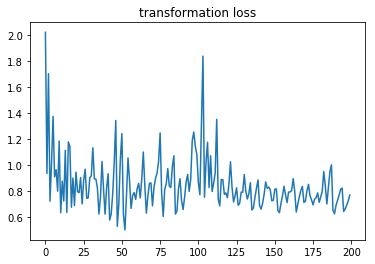

In [370]:
# trainer.t
trainer.train(sent_sampler_1, sent_sampler_2, embed_sampler_1, embed_sampler_2, params)

In [371]:
# trainer.train(sent_sampler_1, sent_sampler_2, embed_sampler_1, embed_sampler_2, params)

In [137]:
cls = cls.eval()

In [27]:
batch_1 = embed_sampler_2.get_batch(32)

In [28]:
# batch_1

In [32]:
tr = cls.transform2(torch.autograd.Variable(torch.from_numpy(batch_1.astype(np.float32))).cuda()).data.cpu().numpy()

In [63]:
# v1 = vocab1.embeddings[vocab1.transform_one(["air", "makanan", "pokok"])[:-1].ravel()]
v1 = vocab1.embeddings[vocab1.transform_one(["eau", "aliments", "arbre"])[:-1].ravel()]

In [64]:
v1_t = cls.transform1(torch.autograd.Variable(torch.from_numpy(v1.astype(np.float32))).cuda()).data.cpu().numpy()

In [65]:
# v2 = vocab1.embeddings[vocab2.transform_one(["agua", "comida", "árbol"])[:-1].ravel()]
v2 = vocab1.embeddings[vocab2.transform_one(["water", "food", "tree"])[:-1].ravel()]

In [66]:
v2_t = tr = cls.transform2(torch.autograd.Variable(torch.from_numpy(v2.astype(np.float32))).cuda()).data.cpu().numpy()

In [67]:
(v1 * v2).sum(axis=1)/((v1**2).sum(axis=1) * (v2**2).sum(axis=1))**0.5

array([0.08949653, 0.14101503, 0.44295534])

In [68]:
(v1 * v2_t).sum(axis=1)/((v1**2).sum(axis=1) * (v2_t**2).sum(axis=1))**0.5

array([ 0.02270542, -0.02349185,  0.05355266])

In [69]:
np.abs(v1 - v2_t).max()/max(v1.max(), v2_t.max())

1.1760207505673008

In [25]:
import evaluation

In [27]:
x1, mask1, y1 = cls.prepare_data_for_classifier(*sent_sampler_1.get_test())
x1 = cls.transform1(x1)

In [28]:
x2, mask2, y2 = cls.prepare_data_for_classifier(*sent_sampler_2.get_test())
x2 = cls.transform2(x2)

In [29]:
cls.classifier.get_loss(x1, mask1, y1)

Variable containing:
 0.1513
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [30]:
cls.classifier.get_loss(x2, mask2, y2)

Variable containing:
 0.7509
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [28]:
_, pred_1 = cls.classifier.forward(x1, mask1)

In [29]:
pred_1 = pred_1.data.cpu().numpy()
y1 = y1.data.cpu().numpy()

In [25]:
def accuracy(predicted_probs, true_y):
    res = np.count_nonzero(predicted_probs.argmax(axis=1) == true_y)
    denom = max(len(true_y), 1)
    return res, len(true_y), res/denom

In [31]:
# del pred_1, y1

In [32]:
accuracy(pred_1, y1)

(983, 1024, 0.9599609375)

In [31]:
_, pred_2 = cls.classifier.forward(x2, mask2)

In [32]:
pred_2 = pred_2.data.cpu().numpy()
y2 = y2.data.cpu().numpy()

In [35]:
accuracy(pred_2, y2)

(783, 1024, 0.7646484375)

In [36]:
 cls.transformation_2.cuda()

Sequential(
  (0): Linear(in_features=100, out_features=100)
  (1): LeakyReLU(0.3)
)

In [28]:
n1 = embed_sampler_1.vocab.embeddings.shape[0]
n2 = embed_sampler_2.vocab.embeddings.shape[0]

n1 = 5000
n2 = 5000

In [29]:
cls.eval()

GAN(
  (discriminator): Discriminator(
    (actual_model): Sequential(
      (0): Linear(in_features=100, out_features=1024)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
      (2): LeakyReLU(0.3)
      (3): Linear(in_features=1024, out_features=512)
      (4): Dropout(p=0.5)
      (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
      (6): LeakyReLU(0.3)
      (7): Linear(in_features=512, out_features=2)
    )
    (softmax): Softmax()
    (loss_function): CrossEntropyLoss(
    )
  )
  (classifier): RnnClassifier(
    (rnn_cell): LSTM(100, 128, batch_first=True)
    (dense): Linear(in_features=128, out_features=256)
    (logits_layer): Linear(in_features=256, out_features=26)
    (softmax_layer): Softmax()
    (loss_function): CrossEntropyLoss(
    )
  )
  (transformation_1): Sequential(
    (0): Linear(in_features=100, out_features=100)
  )
  (transformation_2): Sequential(
    (0): Linear(in_features=100, out_features=100)
  )
)

In [51]:
gc.collect()
torch.cuda.empty_cache()

In [30]:
import sklearn
from sklearn.metrics import log_loss, accuracy_score

In [48]:
def build_confusion_matrix(predicted_probs, true_y):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    true = true_y
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
#     norm = result.sum(axis=1)
#     norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result


In [39]:
def get_probs(transformation, model, embeddings, batch_size, use_cuda):
    result = []
    for position in range(0, len(embeddings), batch_size):
        x = embeddings[position:position + batch_size]
        x = torch.autograd.Variable(torch.from_numpy(x)).float()
        if use_cuda:
            x = x.cuda()
        
        x = transformation(x)
        _, probs = model.discriminator.forward(x)
        probs = probs.data.cpu().numpy()
        result.append(probs)
        
    return np.vstack(result)

In [59]:
def validate(model, embeddings_1, embeddings_2, batch_size, use_cuda):
    probs_1 = get_probs(model.transform1, model, embeddings_1, batch_size, use_cuda)
    probs_2 = get_probs(model.transform2, model, embeddings_2, batch_size, use_cuda)
    probs = np.vstack([probs_1, probs_2])
    
    pred_1 = probs_1.argmax(axis=1).reshape(-1, 1)
    pred_2 = probs_2.argmax(axis=1).reshape(-1, 1)    
    pred = np.vstack([pred_1, pred_2])
    
    y_true = np.concatenate([np.zeros((len(pred_1),)), np.ones((len(pred_2)))])
    
    
    acc = accuracy_score(y_pred=pred, y_true=y_true)
    loss = log_loss(y_pred=probs, y_true=y_true)
    cm = build_confusion_matrix(probs, y_true)
    
    plt.hist(probs[:, 1], bins=100, label="1")
    plt.hist(probs[:, 0], bins=100, label="0")
    plt.legend()
    plt.show()
    
    return acc, loss, cm, probs, y_true
    

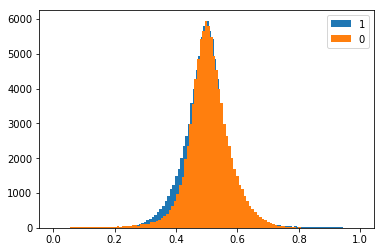

Accuracy  0.5196927654276701
Loss  0.698104797014045
Confusion matrix
 [[26304. 21073.]
 [24451. 22953.]]


In [60]:
result = validate(cls, vocab1.embeddings, vocab2.embeddings, 200, use_cuda=True)
print("Accuracy ", result[0])
print("Loss ", result[1])
print("Confusion matrix\n", result[2])

In [42]:

# for iteration_id in range(100):
#     x1 = embed_sampler_1.get_batch(n1).astype(np.float32)
#     x1_old = torch.autograd.Variable(torch.from_numpy(x1)).cuda()
#     x1 = cls.transform1(x1_old)
#     del x1_old

#     # x2, _, _= sent_sampler_2.get_test()
#     x2 = embed_sampler_2.get_batch(n2).astype(np.float32)
#     # x2 = x2.cuda()
#     x2_old = torch.autograd.Variable(torch.from_numpy(x2)).cuda()
#     x2 = cls.transform2(x2_old)


#     y = torch.autograd.Variable(torch.cat([torch.zeros(n1), torch.ones(n2)], 0)).long().cuda()
#     x = torch.cat([x1, x2], 0)
#     loss = cls.discriminator.get_loss(x, y)
#     loss = loss.data.cpu().numpy()[0]
#     _, probs = cls.discriminator.forward(x)
#     probs = probs.data.cpu().numpy()
#     pred = probs.argmax(axis=1)
#     y_ = y.data.cpu().numpy()
#     accuracy = np.count_nonzero(pred == y_)/len(y_)
#     print(loss, accuracy)
#     a = probs[pred == 1, 1].mean()
#     b = probs[pred == 0, 1].mean()
#     print(a, b)
#     a = probs[pred == 1, 1].min()
#     b = probs[pred == 0, 1].max()
#     print(a, b)
#     y__ = np.zeros(shape=(len(y_), 2))
#     y__[y_ == 1, 1] = 1
#     y__[y_ == 0, 0] = 1
#     cm = build_confusion_matrix(probs, y__)
#     print(cm)
#     plt.hist(probs[:, 1])
#     plt.show()

In [43]:
# probs

In [44]:
# cls.discriminator_step(x, y)

In [45]:
# cls.discriminator.actual_model.zero_grad()

In [ ]:
y.shape

0.741

In [352]:
y_[pred == y_]

array([0, 0, 0, ..., 1, 1, 1])

In [357]:
def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")

In [358]:
# plot_confusion_matrix(cm)

In [359]:
cm[1][0]

1938.0

In [360]:
cm

array([[4348.,  652.],
       [1938., 3062.]])

(array([1.647e+03, 3.028e+03, 4.135e+03, 1.133e+03, 1.400e+01, 1.400e+01,
        1.100e+01, 4.000e+00, 7.000e+00, 7.000e+00]),
 array([0.35679463, 0.41784872, 0.4789028 , 0.53995689, 0.60101098,
        0.66206507, 0.72311916, 0.78417325, 0.84522734, 0.90628143,
        0.96733552]),
 <a list of 10 Patch objects>)

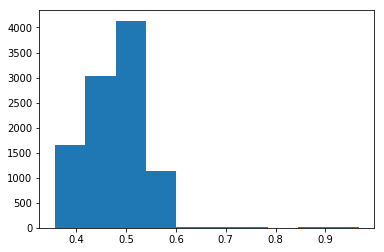

In [140]:
np.count_nonzero(probs[:, 0] < 0.999) / len(probs)

1.0

In [141]:
a = x2.cpu().data.numpy()

In [53]:
b = x1.cpu().data.numpy()

In [54]:
x2 = x2.data.cpu().numpy()

In [55]:
x2_old = x2_old.data.cpu().numpy()

In [56]:
x1 = x1.data.cpu().numpy()

In [57]:
v1 = x1.var(axis=1)

In [58]:
v2 = x2.var(axis=1)

In [59]:
v1.mean(), v2.mean()

(0.11046429, 102.2626)

In [60]:
x1[:, 23].mean(), x2[:, 23].mean()

(-0.02716727, 12.107327)

In [61]:
a[:, 2].min(), a[:, 2].max()

(-3.7124705, 174.79897)

In [62]:
b[:, 1].min(), b[:, ].max()

(-1.4277, 2.6908)

In [63]:
v1[0]

0.16367291

In [64]:
v2_t[0]

NameError: name 'v2_t' is not defined

In [65]:
import sklearn.metrics as skms

In [74]:
skms.pairwise.cosine_similarity(x1[:5], x2[:5]).ravel()

array([ 0.39520594,  0.30639488,  0.44650787,  0.1645084 ,  0.35313922,
        0.26134342,  0.16894002,  0.20646647, -0.02554763,  0.20384546,
        0.5050079 ,  0.34302565,  0.29202652,  0.41267747,  0.53470004,
        0.16313905,  0.21574289,  0.22009766,  0.22442156,  0.2420528 ,
        0.06621529,  0.07761168, -0.05406904,  0.35286176,  0.1814011 ],
      dtype=float32)

In [75]:
skms.pairwise.cosine_similarity(x1[:5], x2_old[:5]).ravel()

array([ 0.11918166,  0.02951451, -0.0456996 ,  0.01172976,  0.181189  ,
        0.00820952, -0.06260593, -0.07489959, -0.02220186, -0.01885154,
        0.10764948, -0.00161014,  0.07105204,  0.07839131,  0.04724923,
       -0.18810102, -0.18871957, -0.12664916, -0.11190072,  0.05522443,
       -0.17025638, -0.1770258 ,  0.02469893, -0.05895214, -0.04473685],
      dtype=float32)

In [226]:
from sklearn.decomposition import PCA

In [227]:
pca = PCA(n_components=2)

In [228]:
pca.fit(vocab1.embeddings)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [84]:
transformed_x1 = pca.transform()

In [33]:
b2 = embed_sampler_2.get_batch(32).astype(np.float32)
# x2 = x2.cuda()
b2_t = torch.autograd.Variable(torch.from_numpy(b2)).cuda()
b2_t = cls.transform2(b2_t)

In [43]:
transformed_x2 = pca.transform(b2)

In [44]:
transformed_x2_t = pca.transform(b2_t.data.cpu().numpy())

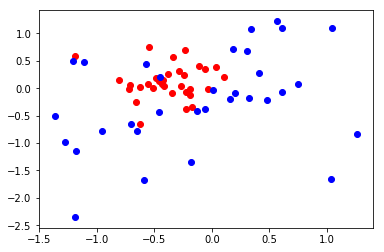

In [46]:
# plt.scatter(transformed_x1[:, 0], transformed_x1[:, 1])
plt.scatter(transformed_x2[:, 0], transformed_x2[:, 1], color='r')
plt.scatter(transformed_x2_t[:, 0], transformed_x2_t[:, 1], color='b')

In [23]:
for v in vocab2.words[200:225]:
    print(v)

help
family
group
look
own
president
top
man
come
october
big
every
things
30
women
9
found
public
ll
campaign
set
left
better
country
never


In [229]:
e = """
help
family
group
look
own
president
high
man
come
october
big
every
thing
woman
find
public
campaign
water
left
good
country
never
"""
e = [w.strip() for w in e.split("\n") if len(w) > 1]

In [230]:
f = """
aider
famille
groupe
regarder
posséder
président
haut
homme
venir
octobre
gros
chaque
chose
femme
trouver
publique
campagne
eau
gauche
bien
pays
jamais
"""
f = [w.strip() for w in f.split("\n") if len(w) > 1]

In [231]:
# cls = cls.cpu()
from sklearn.decomposition import PCA

In [232]:
pca = PCA(n_components=2)

In [233]:
all_x1 = torch.autograd.Variable(torch.from_numpy(vocab1.embeddings).float()).cuda()

In [33]:
# all_x1t = cls.transform1(all_x1)
# all_x1t = all_x1t.cpu().data.numpy()

In [42]:
pca.fit(all_x1t)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [36]:
x1 = vocab1.get_word_embeddings(f).astype(np.float32)
x1 = torch.autograd.Variable(torch.from_numpy(x1)).cuda()
x1_t = cls.transform1(x1)

In [38]:
x2 = vocab2.get_word_embeddings(e).astype(np.float32)
x2 = torch.autograd.Variable(torch.from_numpy(x2)).cuda()
x2_t = cls.transform2(x2)

In [44]:
t1 = pca.transform(x1_t.data.cpu().numpy())

In [45]:
t2 = pca.transform(x2_t.data.cpu().numpy())

In [46]:
# t2_t = pca.transform(x2_t.data.cpu().numpy())

In [47]:
def plot_word_by_id(t1, t2, t2_t, ids):
#     plt.xlim(-2, 2)
#     plt.ylim(-1, 1)
    plt.scatter(t1[ids, 0], t1[ids, 1], color='r')
    plt.scatter(t2[ids, 0], t2[ids, 1], color='b')
#     plt.scatter(t2_t[ids, 0], t2_t[ids, 1], color='g')
    plt.show()

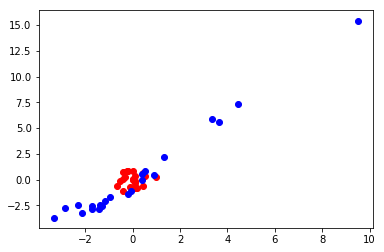

In [49]:
plot_word_by_id(t1, t2, None, list(range(22)))